<a href="https://colab.research.google.com/github/ravindrabajpai/sp_forecasting/blob/main/fa_assignment/axis_eda_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
install.packages("quantmod")
install.packages("qrmtools")
install.packages("MASS")
install.packages("PerformanceAnalytics")
install.packages("TSA")
install.packages("forecast")
install.packages("fBasics")
install.packages("urca")
install.packages("DescTools")
install.packages("TTR")
install.packages("tseries")
install.packages("fBasics")
install.packages("lubridate")
install.packages("bestNormalize") # to use yeo.jhonson for negative values.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Inst

# New Section

In [14]:
library(quantmod)
library(qrmtools)
library(MASS)
library(PerformanceAnalytics)
library(TSA)
library(forecast)
library(fBasics)
library(urca)
library(DescTools)
library(TTR)
library(tseries)
library(fBasics)
library(lubridate)
library(bestNormalize)

In [15]:
get_start_date <- function(num_years=5) {
  return(Sys.Date() - years(num_years))
}

start_date <- get_start_date()
start_date


[1] "2017-04-27"

In [176]:
# Download data from Yahoo Finance
symbol<-getSymbols("AXISBANK.NS",from=start_date,auto.assign=FALSE)



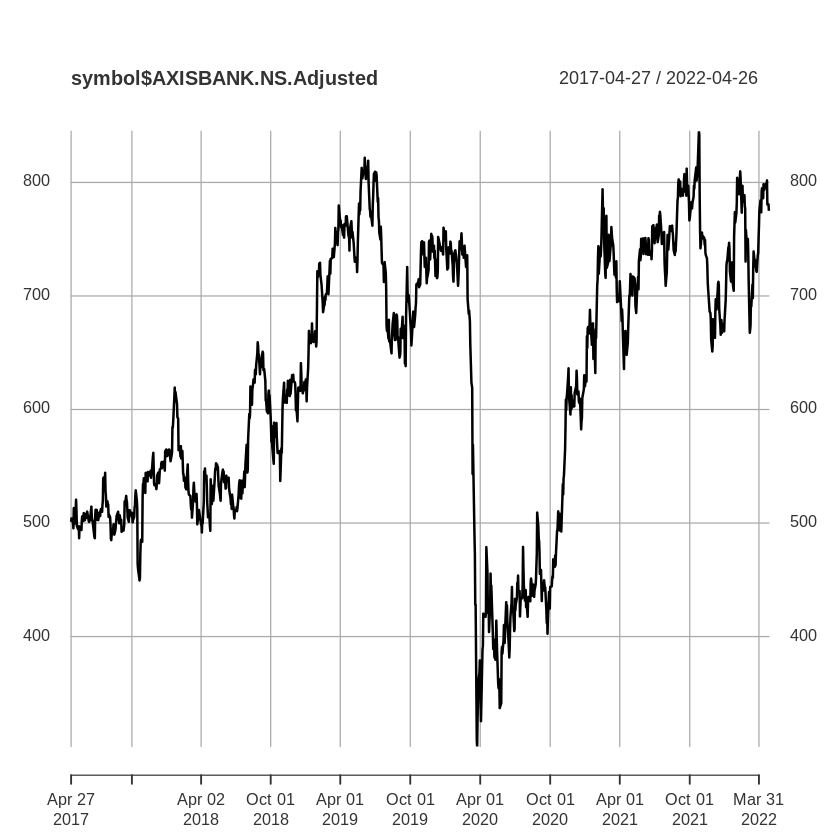

In [177]:
plot(symbol$AXISBANK.NS.Adjusted)

In [178]:
summary(symbol)# To understand any missing values in any columns, NA's   :4   
symbol<-na.omit(symbol)
symbol<-symbol[symbol$AXISBANK.NS.Volume>0,]

     Index            AXISBANK.NS.Open AXISBANK.NS.High AXISBANK.NS.Low
 Min.   :2017-04-27   Min.   :293.5    Min.   :337.5    Min.   :286.0  
 1st Qu.:2018-07-21   1st Qu.:521.0    1st Qu.:527.9    1st Qu.:513.4  
 Median :2019-10-31   Median :639.0    Median :650.0    Median :628.5  
 Mean   :2019-10-26   Mean   :625.7    Mean   :634.1    Mean   :616.3  
 3rd Qu.:2021-01-23   3rd Qu.:736.0    3rd Qu.:745.0    3rd Qu.:727.0  
 Max.   :2022-04-26   Max.   :848.4    Max.   :866.9    Max.   :825.5  
 AXISBANK.NS.Close AXISBANK.NS.Volume AXISBANK.NS.Adjusted
 Min.   :303.1     Min.   :  793433   Min.   :303.1       
 1st Qu.:520.2     1st Qu.: 6425286   1st Qu.:519.4       
 Median :638.2     Median : 9305124   Median :637.4       
 Mean   :625.1     Mean   :13631156   Mean   :624.6       
 3rd Qu.:736.1     3rd Qu.:16171490   3rd Qu.:736.1       
 Max.   :845.1     Max.   :96186227   Max.   :845.1       

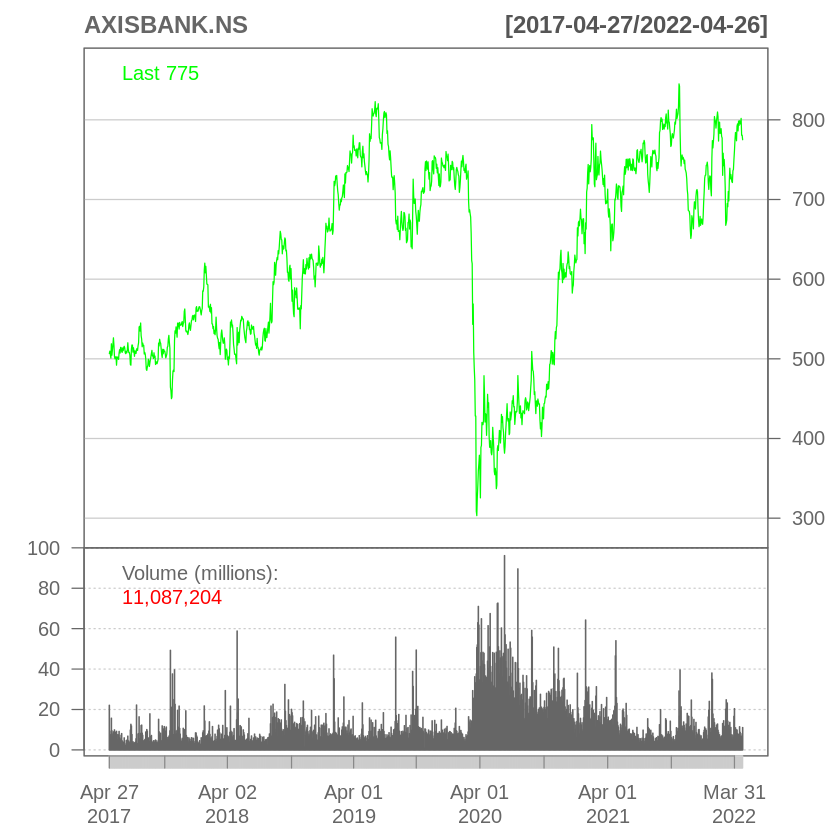

In [179]:
chartSeries(symbol,theme="white.mono",name="AXISBANK.NS",type = 'line', up.col = "green",dn.col="red")

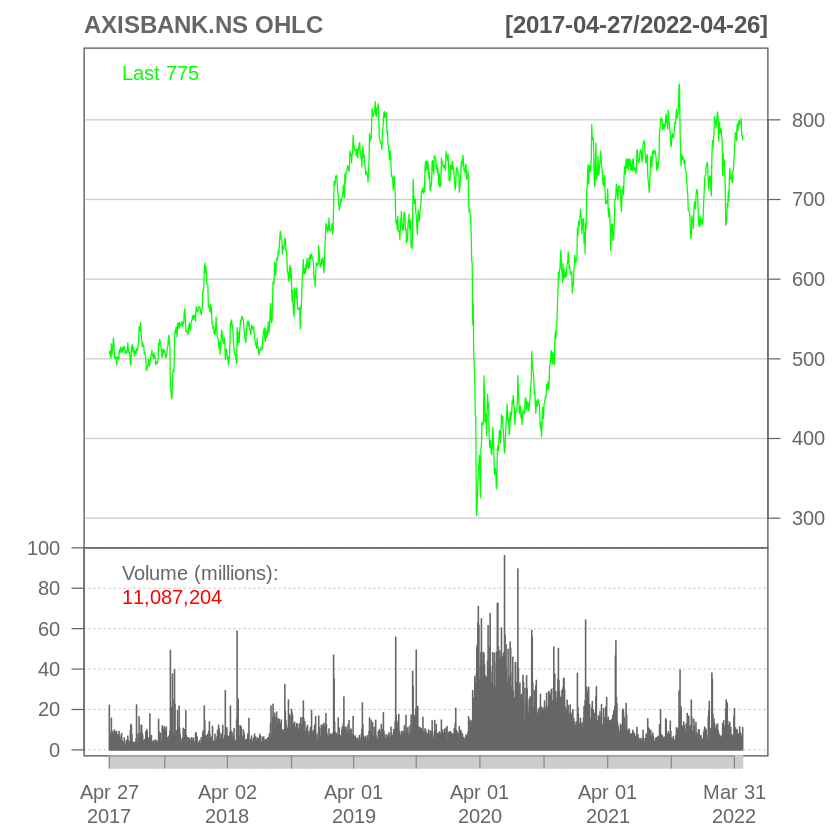

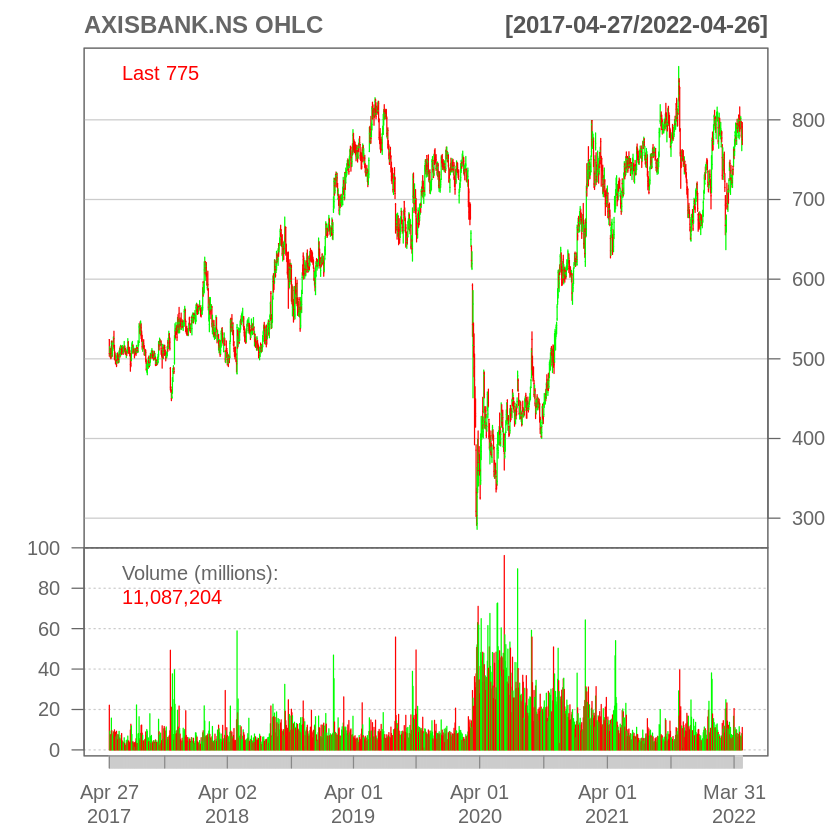

In [180]:
# Convert the Yahoo data into an OHLC Chart
symbol_ohlc<-as.quantmod.OHLC(symbol[,-6],col.names=c("Open","High","Low","Close","Volume"))
# Plotting the Open High Low Close charts along with volume
chartSeries(symbol_ohlc, theme="white.mono", type ='line', name="AXISBANK.NS OHLC", up.col = "green",dn.col="red")
chartSeries(symbol_ohlc, theme="white.mono", type ='bar',  name="AXISBANK.NS OHLC", up.col = "green",dn.col="red")
# chartSeries(symbol_ohlc, theme="white.mono", type ='hlc',  name="AXISBANK.NS OHLC", up.col = "green",dn.col="red")

In [181]:
# COmputing the returns using ln(p2/P1) - Geometric returns or Logarithmic returns
returns<-Return.calculate(symbol$AXISBANK.NS.Adjusted,method = "log")
returns<-na.omit(returns)
head(returns)
write.csv(returns,"AXISBANK_returns.csv",row.names=FALSE)

           AXISBANK.NS.Adjusted
2017-04-28          0.006002401
2017-05-02         -0.008077292
2017-05-03         -0.009340230
2017-05-04          0.035308061
2017-05-05         -0.028046914
2017-05-08          0.013193134

In [182]:
#Exploratory Data Analysis
#Calculating descriptive statistics

#Test of Normality
# p-value is less than 0.5, hence data price data is not normal 
# Basic idea is this - if the data is normal then we should use tests which work on normal data
# or if the data is not normal, then we should use other tests suitable for non-normal data
# given below 4 tests work well for normal data.
# The central limit theorem (CLT) states that the distribution of sample means approximates 
# a normal distribution as the sample size gets larger, regardless of the population's distribution. 
# Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.
# data from NSE/BSE is more accurate than from Yahoo, but need to do a lot of cleansing.
prices<-symbol[,6]
prices <- na.omit(prices)
jarqueberaTest(prices$AXISBANK.NS.Adjusted)


Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 76.8709
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Wed Apr 27 04:19:44 2022 by user: 


In [183]:
# same test on returns data
# p-value is less than 0.5, hence returns data is not normal for AXISBANK.NS
jarqueberaTest(returns$AXISBANK.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 48134.8513
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Wed Apr 27 04:19:51 2022 by user: 


In [184]:
# Now we do other tests for same data for cross check
shapiroTest(prices$AXISBANK.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9464
  P VALUE:
    < 2.2e-16 

Description:
 Wed Apr 27 04:19:54 2022 by user: 


In [185]:
shapiroTest(returns$AXISBANK.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.8478
  P VALUE:
    < 2.2e-16 

Description:
 Wed Apr 27 04:19:57 2022 by user: 


In [186]:
# Test for stationarity - Augmented Dickey-Fuller Test
adf.test(prices$AXISBANK.NS.Adjusted) #  p-value = 0.41, not stationary




	Augmented Dickey-Fuller Test

data:  prices$AXISBANK.NS.Adjusted
Dickey-Fuller = -2.463, Lag order = 10, p-value = 0.3823
alternative hypothesis: stationary


In [187]:
adf.test(returns$AXISBANK.NS.Adjusted) 

Warning message in adf.test(returns$AXISBANK.NS.Adjusted):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  returns$AXISBANK.NS.Adjusted
Dickey-Fuller = -10.473, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [188]:
# altrenative to adf.test, as adf is not giving required results
summary(ur.df(prices$AXISBANK.NS.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-119.562   -6.610   -0.075    7.123   62.742 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
z.lag.1     0.0001400  0.0005951   0.235    0.814
z.diff.lag -0.0184608  0.0285087  -0.648    0.517

Residual standard error: 13.29 on 1231 degrees of freedom
Multiple R-squared:  0.0003789,	Adjusted R-squared:  -0.001245 
F-statistic: 0.2333 on 2 and 1231 DF,  p-value: 0.792


Value of test-statistic is: 0.2352 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [189]:
summary(ur.df(returns$AXISBANK.NS.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32665 -0.01109  0.00005  0.01173  0.17714 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -1.005984   0.040570 -24.797   <2e-16 ***
z.diff.lag -0.006177   0.028512  -0.217    0.829    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02454 on 1230 degrees of freedom
Multiple R-squared:  0.5061,	Adjusted R-squared:  0.5053 
F-statistic: 630.3 on 2 and 1230 DF,  p-value: < 2.2e-16


Value of test-statistic is: -24.7965 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [190]:
summary(ur.kpss(prices$AXISBANK.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 3.6928 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [191]:
summary(ur.kpss(returns$AXISBANK.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.0484 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


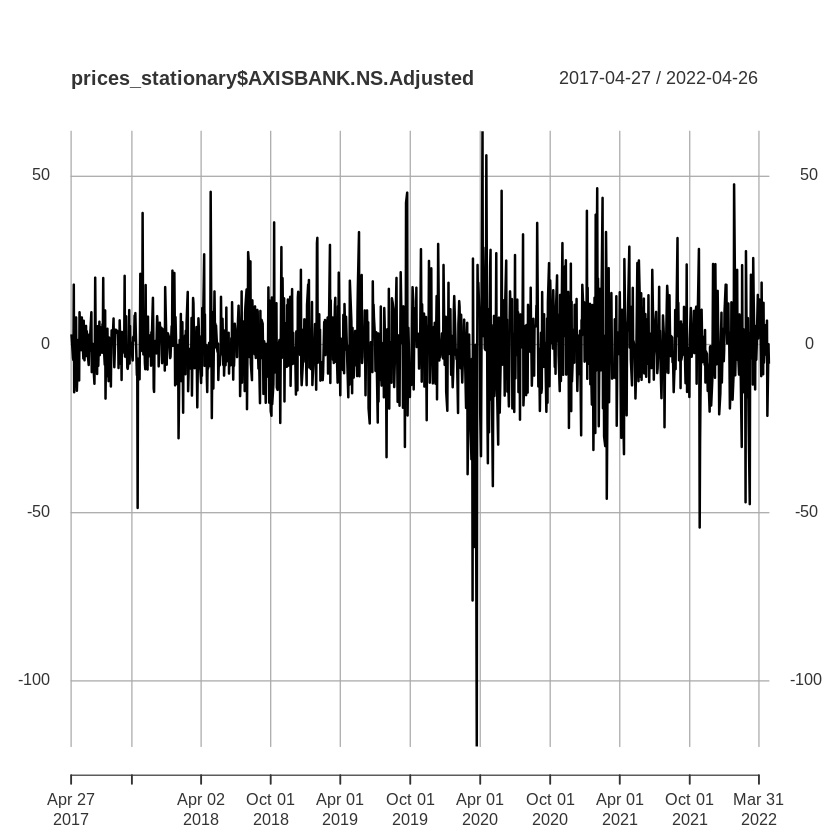

In [192]:
# if data is not stationary then the first step is to make
# the data stationalry
# method to follow is the 
# Differenceing the data

prices_stationary <- diff(prices)
plot (prices_stationary$AXISBANK.NS.Adjusted)

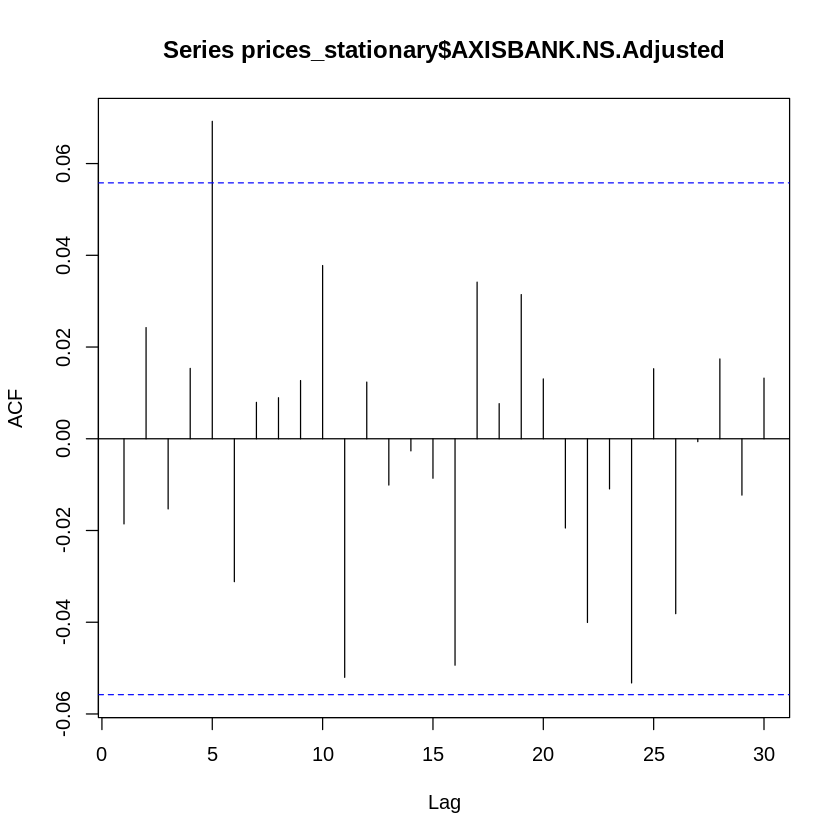

In [193]:
# Now if we have the stationary data
# we can make Auto correlation plots -
# Advised on stationrity of data

prices_stationary<-na.omit(prices_stationary)
acf(prices_stationary$AXISBANK.NS.Adjusted)

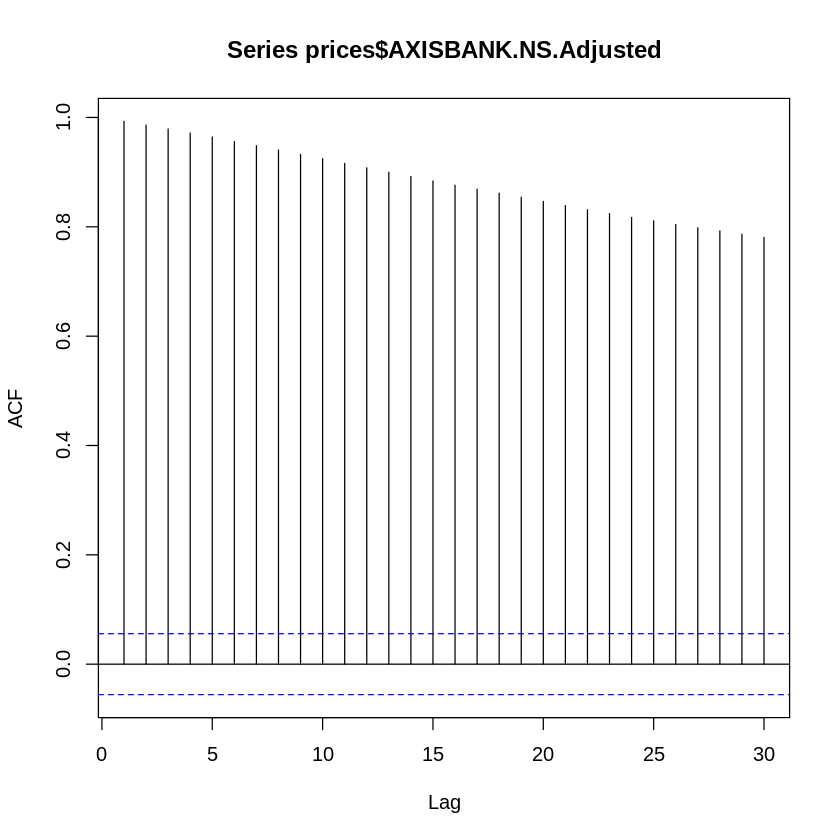

In [194]:
# on the otherhand if we compute ACF on data with trend
prices<-na.omit(prices)
acf(prices$AXISBANK.NS.Adjusted)

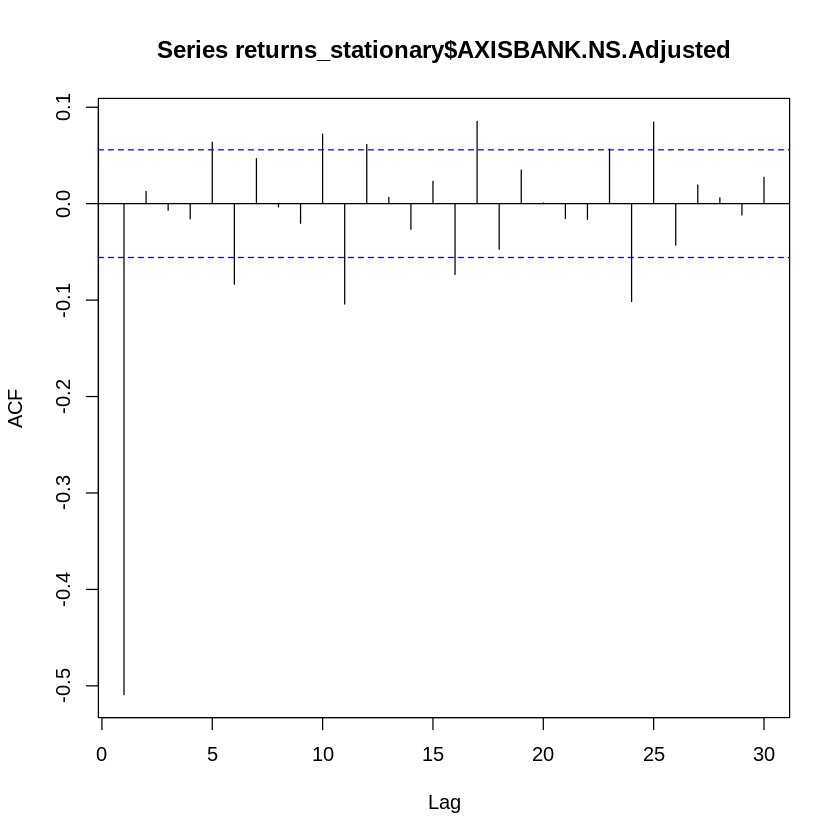

In [195]:
# similarly, finding acf for returns.
returns_stationary <- diff(returns)
returns_stationary<-na.omit(returns_stationary)
acf(returns_stationary$AXISBANK.NS.Adjusted)

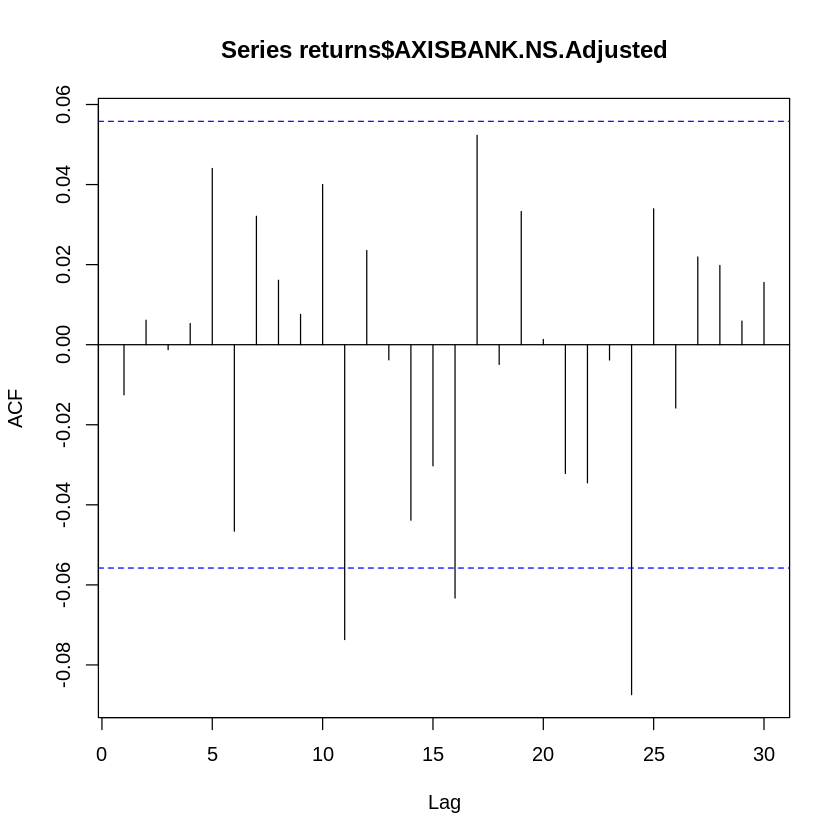

In [196]:
# on the otherhand if we compute ACF on data with trend
returns<-na.omit(returns)
acf(returns$AXISBANK.NS.Adjusted)

In [197]:
# tests for auto-corelation
Box.test(prices_stationary$AXISBANK.NS.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  prices_stationary$AXISBANK.NS.Adjusted
X-squared = 7.6804, df = 5, p-value = 0.1748


In [198]:
# for returns
Box.test(returns_stationary$AXISBANK.NS.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  returns_stationary$AXISBANK.NS.Adjusted
X-squared = 326, df = 5, p-value < 2.2e-16


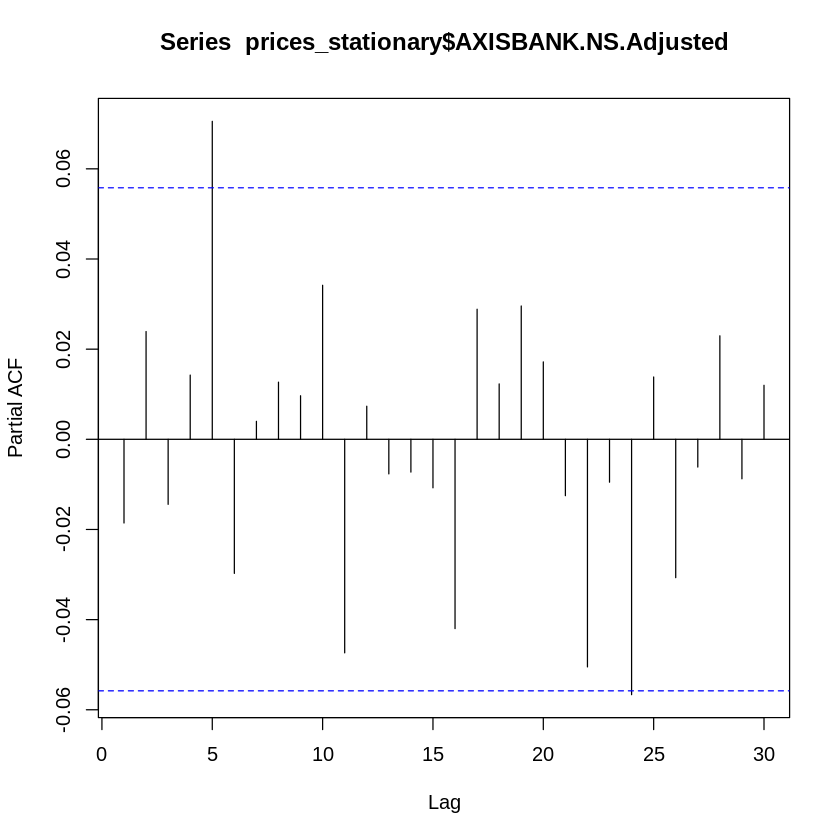

In [199]:
#PACF
pacf(prices_stationary$AXISBANK.NS.Adjusted)

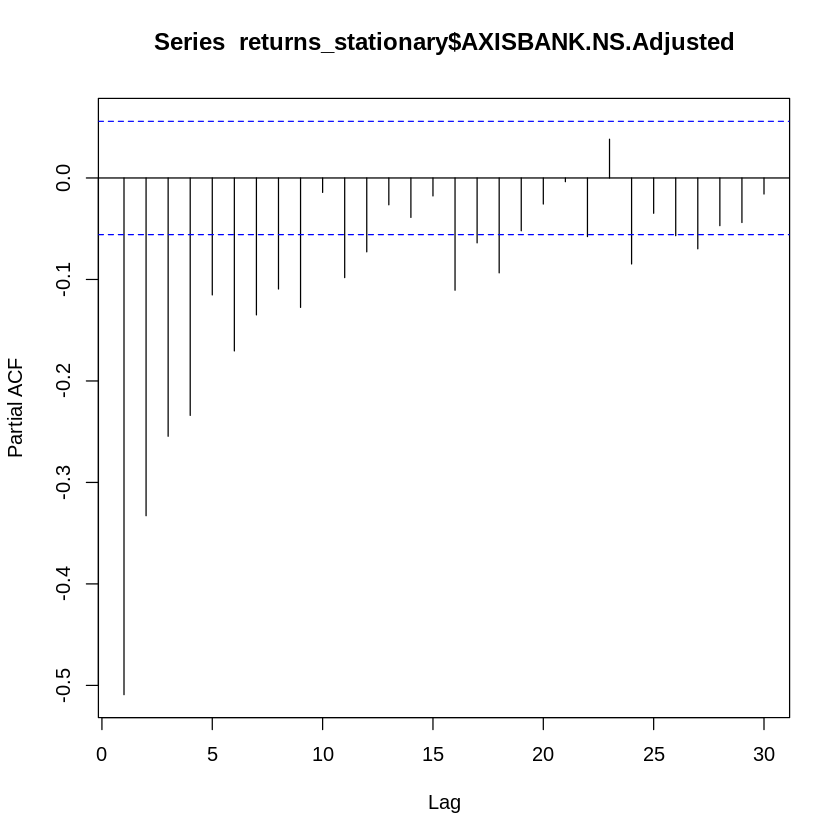

In [200]:
pacf(returns_stationary$AXISBANK.NS.Adjusted)

In [201]:
basicStats(prices)

,AXISBANK.NS.Adjusted
,<dbl>
nobs,1235.000000
NAs,0.000000
Minimum,303.149994
Maximum,845.099976
1. Quartile,519.354981
3. Quartile,736.125000
Mean,624.633630
Median,637.408386
Sum,771422.533465


In [202]:
BoxCox.lambda(prices$AXISBANK.NS.Adjusted)

[1] 1.410032

In [203]:
# To make our data appear normal
prices_normal<-prices
prices_normal$AXISBANK.NS.Adjusted<-forecast::BoxCox(prices$AXISBANK.NS.Adjusted, lambda = 1.41003164871004)
basicStats(prices_normal)

,AXISBANK.NS.Adjusted
,<dbl>
nobs,1.235000e+03
NAs,0.000000e+00
Minimum,2.237944e+03
Maximum,9.501053e+03
1. Quartile,4.781866e+03
3. Quartile,7.820314e+03
Mean,6.271756e+03
Median,6.383233e+03
Sum,7.745618e+06


In [204]:
returns_normal<-returns
# to handle negative values in the returns
returns_normal<-exp(returns_normal)
returns_normal<-na.omit(returns_normal)
BoxCox.lambda(returns_normal$AXISBANK.NS.Adjusted)


[1] 1.999924

In [205]:
returns_normal$AXISBANK.NS.Adjusted<-forecast::BoxCox(returns$AXISBANK.NS.Adjusted, lambda = 1.99992424816297)
# need to take log, basically to undo the exp above
# returns_normal<-log(returns_normal) 
basicStats(returns_normal)

,AXISBANK.NS.Adjusted
,<dbl>
nobs,1234.000000
NAs,0.000000
Minimum,-0.553577
Maximum,-0.484177
1. Quartile,-0.500080
3. Quartile,-0.499949
Mean,-0.500040
Median,-0.500019
Sum,-617.049888


In [207]:
model<-auto.arima(prices$AXISBANK.NS.Adjusted,max.p = 10, max.d=2, max.q = 10, max.order = 20, trace = TRUE)
forecast(model, 10)
# Note the best fitting model below :  Best model: ARIMA(0,1,0)  


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : Inf
 ARIMA(0,1,0) with drift         : 9882.465
 ARIMA(1,1,0) with drift         : 9885.005
 ARIMA(0,1,1) with drift         : 9884.069
 ARIMA(0,1,0)                    : 9880.804
 ARIMA(1,1,1) with drift         : 9886.596

 Now re-fitting the best model(s) without approximations...

 ARIMA(0,1,0)                    : 9885.975

 Best model: ARIMA(0,1,0)                    



     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1236            775 757.9869 792.0131 748.9807 801.0193
1237            775 750.9398 799.0602 738.2031 811.7969
1238            775 745.5324 804.4676 729.9332 820.0668
1239            775 740.9738 809.0262 722.9614 827.0386
1240            775 736.9575 813.0425 716.8190 833.1810
1241            775 733.3266 816.6734 711.2660 838.7340
1242            775 729.9875 820.0125 706.1594 843.8406
1243            775 726.8796 823.1204 701.4063 848.5937
1244            775 723.9607 826.0393 696.9421 853.0579
1245            775 721.1998 828.8002 692.7197 857.2803

In [208]:
cor(prices)

,AXISBANK.NS.Adjusted
AXISBANK.NS.Adjusted,1


In [209]:
cor(returns)

,AXISBANK.NS.Adjusted
AXISBANK.NS.Adjusted,1



	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)
Q* = 11.046, df = 10, p-value = 0.3539

Model df: 0.   Total lags used: 10



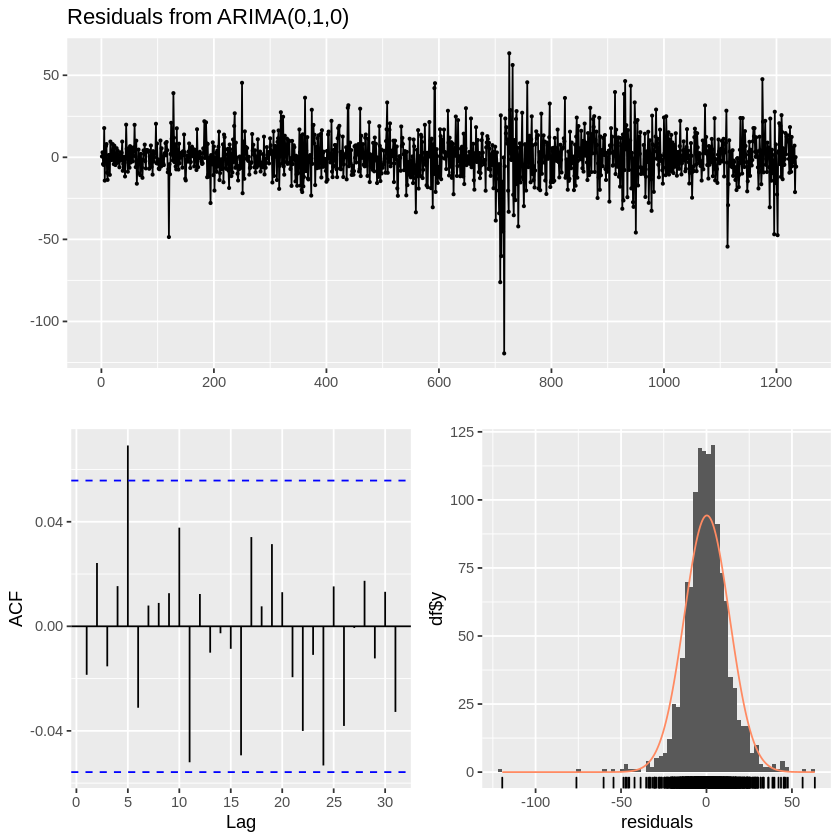

In [210]:
# Model analysis - The residuals will tell us if the model was able to capture 
# all of the information provided by the data.
checkresiduals(model)

In [211]:
# checking the accuracy of the model
accuracy(model)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.2222285,13.27003,9.366993,0.004959112,1.588971,0.9992336,-0.01855696


In [212]:
# Forecast for next day
fcast <- forecast(model, 30)
print(summary(fcast))
tail(prices)


Forecast method: ARIMA(0,1,0)

Model Information:
Series: prices$AXISBANK.NS.Adjusted 
ARIMA(0,1,0) 

sigma^2 = 176.2:  log likelihood = -4941.99
AIC=9885.97   AICc=9885.98   BIC=9891.09

Error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set 0.2222285 13.27003 9.366993 0.004959112 1.588971 0.9992336
                    ACF1
Training set -0.01855696

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1236            775 757.9869 792.0131 748.9807 801.0193
1237            775 750.9398 799.0602 738.2031 811.7969
1238            775 745.5324 804.4676 729.9332 820.0668
1239            775 740.9738 809.0262 722.9614 827.0386
1240            775 736.9575 813.0425 716.8190 833.1810
1241            775 733.3266 816.6734 711.2660 838.7340
1242            775 729.9875 820.0125 706.1594 843.8406
1243            775 726.8796 823.1204 701.4063 848.5937
1244            775 723.9607 826.0393 696.9421 853.0579
1245            775 721.1998 

           AXISBANK.NS.Adjusted
2022-04-19                797.8
2022-04-20                794.7
2022-04-21                801.8
2022-04-22                780.6
2022-04-25                780.7
2022-04-26                775.0

[1] 1235

[1] 12.61054

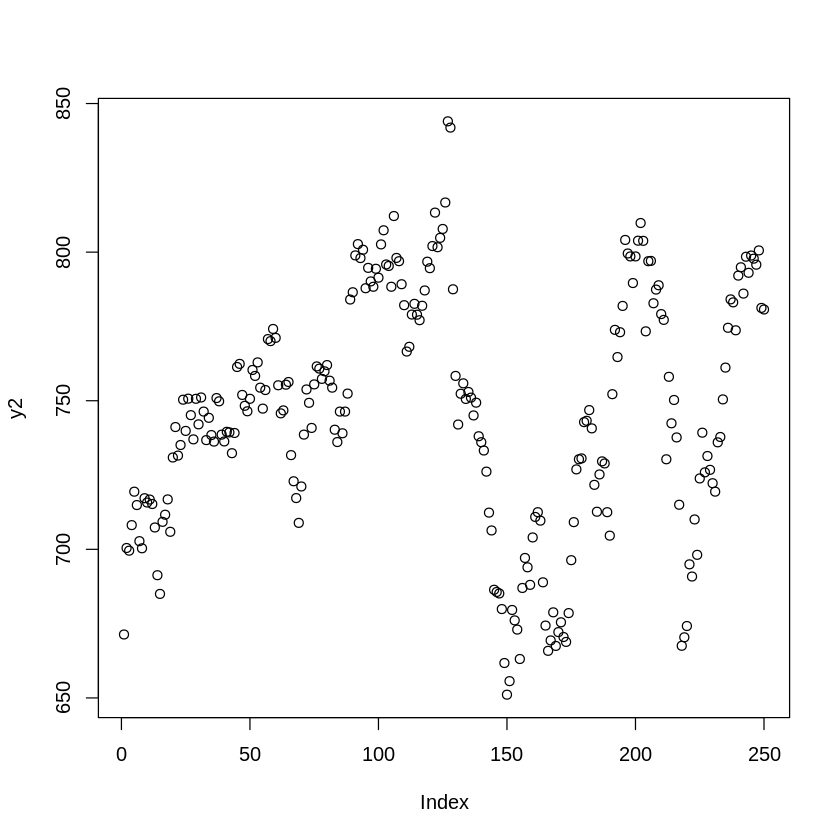

In [213]:
# Rolling window based price prediction. Test window is 250 days with 1 day of drift.
# the total data is of 1235 (numrows) days. 
# so in the loop we go from 1 to 250 and keep on increasing the model for next day using i in the loop.
# everytime we forecast using model and collect only the mean (there are other values as hi, lo etc)
# so there are 250 arima models built using rolling window mechanism. One model per day.
y2<-c()
numrows <-nrow(prices)
numrows
for (i in 1:250) {
  
  model2<-auto.arima(prices$AXISBANK.NS.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model2,h=1)$mean
  y2<-c(y2,y)
}
plot(y2)
RMSE(y2,tail(prices$AXISBANK.NS.Adjusted,250)) 


[1] 1234

[1] 0.01700757

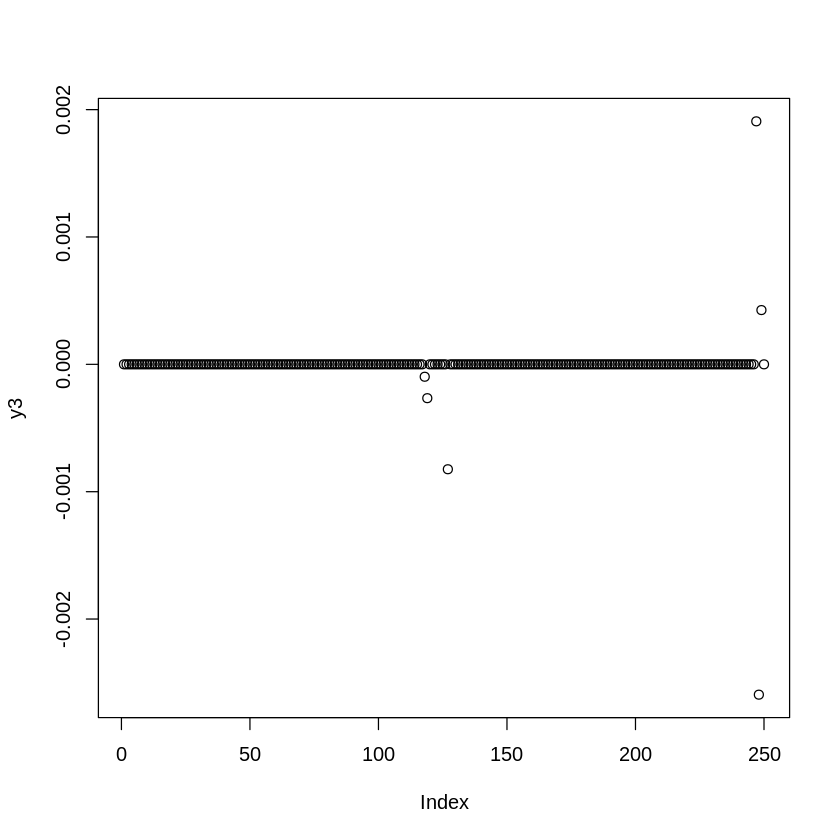

In [214]:
# Similarly for returns
y3<-c()
numrows <-nrow(returns)
numrows
for (i in 1:250) {
  
  model3<-auto.arima(returns$AXISBANK.NS.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model3,h=1)$mean
  y3<-c(y3,y)
}
plot(y3)
RMSE(y3,tail(returns$AXISBANK.NS.Adjusted,250)) 